## <u> Classical computer vision - OpenCV <u/>

### Contents:
#### 1. Reading images into OpenCV
#### 2. Plotting/viewing image
#### 3. Converting between color spaces
#### 4. Resizing and rescaling frames
#### 5. Image blurring/ smoothing
#### 6. Image transformations (Flipping, translation, rotation)
#### 7. Drawing on images (Line, rectangle, circle, text)
#### 8. Bitwise operations (and, or, xor, not)
#### 9. Masking
#### 10. Edge detection
#### 11. Template matching
#### 12. Histogram equalisation

In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt



##### <u> 1. Reading images into OpenCV <u/>

In [ ]:
#Reading images
dog_img = cv.imread("dog.jpg")

In [ ]:
# Print the image's array numerically
print(dog_img) 

# gives a 3-dimensional array since the image is coloured (made up of three 2-d arrays)
# gives a 2-dimensional array if the image is grayscale

[[[ 45  89  73]
  [ 62 107  91]
  [ 77 123 106]
  ...
  [230 189 153]
  [230 189 153]
  [230 189 153]]

 [[ 51  98  82]
  [ 51  99  82]
  [ 71 119 102]
  ...
  [230 189 153]
  [230 189 153]
  [230 189 153]]

 [[ 72 122 105]
  [ 38  86  69]
  [ 45  94  77]
  ...
  [230 189 153]
  [230 189 153]
  [230 189 153]]

 ...

 [[ 81 151 129]
  [112 183 163]
  [127 197 178]
  ...
  [100 193 164]
  [104 204 173]
  [109 209 178]]

 [[ 95 166 145]
  [121 193 173]
  [141 211 193]
  ...
  [109 197 168]
  [105 201 171]
  [107 204 173]]

 [[ 84 153 133]
  [126 196 178]
  [142 210 194]
  ...
  [ 96 177 150]
  [108 198 170]
  [106 199 170]]]


In [ ]:
#Opens the image in a window
#cv.imshow("Dog", dog_img)

##### <u> 2. Plotting the image with Matplotlib <u/>

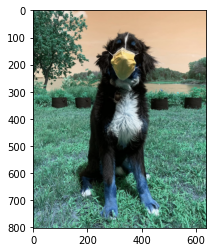

In [ ]:
plt.imshow(dog_img)

##### The resulting image's colours are different from the original image if you open the file on your Desktop, as
 - the image loaded by OpenCV is in **BGR** mode
 -  matplotlib displays in **RGB** mode
 
##### So we need to convert the image from BGR to RGB

##### <u> 3. Converting between color spaces  <u/>

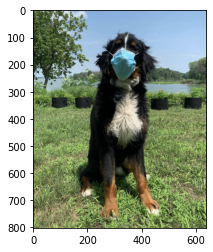

In [ ]:
dog_image_RGB = cv.cvtColor(dog_img, cv.COLOR_BGR2RGB)
plt.imshow(dog_image_RGB)

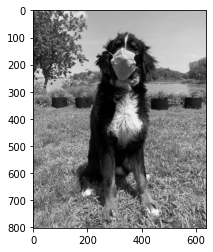

In [ ]:
dog_image_gray = cv.cvtColor(dog_img, cv.COLOR_BGR2GRAY)
plt.imshow(dog_image_gray, cmap="gray")

##### <u> 4. Resizing and rescaling frames  <u/>

- Deep learning models may require that our images are the same size, but the raw images that we collect may vary in size
- Machine learning models train faster on smaller images

In [ ]:
dog_img.shape

(802, 639, 3)

##### For (x, y, z) in image.shape: 
- x: height(no. rows)
- y: width(no. columns)
- z: number of color channels (RGB: 3 vs grayscale: 1)

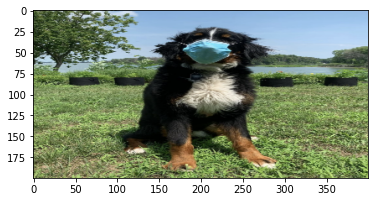

In [ ]:
# Resizing
dog_resized = cv.resize(dog_image_RGB, (400,200))
plt.imshow(dog_resized)

##### You can also define a function that rescales the image (same aspect ratio)

In [ ]:
# Here we are defining the default to be 75% of original size
# works for both image and video

def rescaleFrame(frame, scale=0.75):
    width = int(frame.shape[1]*scale)
    height = int(frame.shape[0]*scale)
    dimensions = (width, height)
    
    return cv.resize(frame, dimensions)   

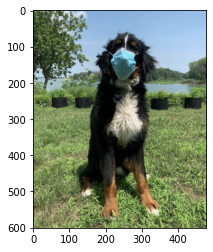

In [ ]:
dog_scaled = rescaleFrame(dog_image_RGB)
plt.imshow(dog_scaled)

# We can see that the range of values on the axes is smaller

##### You can crop images by choosing a subset of the rows and columns of the image array

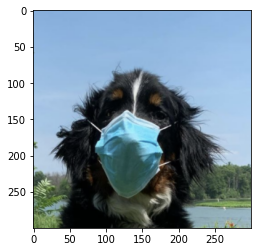

In [ ]:
dog_cropped = dog_image_RGB[0:300, 200:500]
plt.imshow(dog_cropped)

##### <u> 5. Image blurring/ smoothing  <u/> 
- Average blurring
- Median blurring
- Bilateral filtering

- Blurring an image removes "outlier" pixels that may be noise in the image, and is a common operation to be performed before tasks like edge detection

##### 5.1 Average blurring:
##### Takes the average of all the pixels under a specified x by x kernel area and replaces the central element with the average
##### (Disadv: Doesn't preserve the edges well)

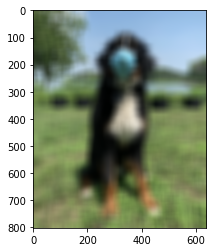

In [ ]:
# parameters: image, kernel size
dog_blurred = cv.blur(dog_image_RGB, (35,35))
plt.imshow(dog_blurred)

##### 5.2 Median blurring:
##### Takes the median of all the pixels under the kernel area. 
- This is more effective against salt and pepper noise in an image, and preserves the edges better than everage blurring


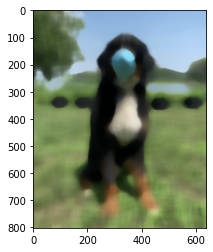

In [ ]:
# parameters: img, ksize (must be odd number)
dog_median_blur = cv.medianBlur(dog_image_RGB, 35)
plt.imshow(dog_median_blur)

##### 5.3. Bilateral Filtering:
- Effectively removes noise while preserving edges & **keeping edges sharp**
- Considers whether a pixel is an edge by **comparing pixel intensity difference**. 
    - Only those pixels with similar intensities to the central pixel are considered for blurring
- Hence, preserves the edges since pixels at edges will have large intensity variation.
- Makes use of 2 gaussian filters
    

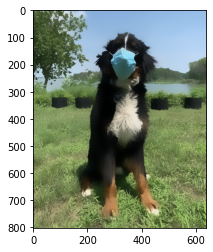

In [ ]:
#parameters: 
dog_bilateral_filter = cv.bilateralFilter(dog_image_RGB, 35, 75, 75)
plt.imshow(dog_bilateral_filter)

# parameters: img, d, sigmaColor, sigmaSpace

# d: diameter of each pixel neighbourhood that is used during filtering

# sigmaColor: larger value means farther colors within the pixel neighborhood will be mixed together, 
# resulting in larger areas of semi-equal color.

# sigmaSpace:  A larger value of the parameter means  farther pixels will influence each other 
# as long as their colors are close enough

##### <u> 6. Image transformations  <u/> 
- Flipping     
- Translation    
- Rotation

- Often used for data augmentation, when training a deep learning model when you have limited data

##### 6.1 Flipping
- 1 for horizontal, 0 for vertical, -1 for both horizontal and vertical

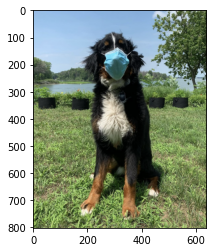

In [ ]:
# Flipping horizontally
dog_flip_x_axis = cv.flip(dog_image_RGB, 1)
plt.imshow(dog_flip_x_axis)

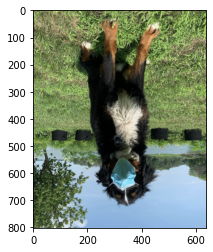

In [ ]:
# Flipping vertically
dog_flip_y_axis = cv.flip(dog_image_RGB, 0)
plt.imshow(dog_flip_y_axis)

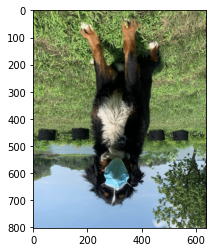

In [ ]:
# Flipping both horizontally and vertically
dog_flip_x_and_y_axis = cv.flip(dog_image_RGB, -1)
plt.imshow(dog_flip_x_and_y_axis)

##### 6.2 Translation

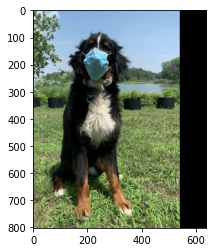

In [ ]:
def translate(img, x,y):
    transMat = np.float32([[1,0,x], [0,1,y]])
    dimensions = (img.shape[1], img.shape[0])
    return cv.warpAffine(img, transMat, dimensions)

dog_left = translate(dog_image_RGB, -100, 0)
plt.imshow(dog_left)

# Positive x --> translation in positive x direction (image moves right)
# Negative x --> translation in negative x direction (image moves left)
# Positive y --> translation in negative y direction (image moves down)
# Negative y --> translation in positive y direction (image moves up)

##### 6.3 Rotation

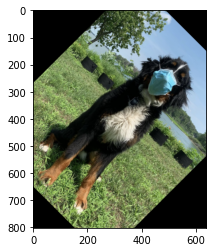

In [ ]:
def rotate(img, angle, rotPoint=None):
    height = img.shape[0]
    width = img.shape[1]
    dimensions = (width, height)
    
    if rotPoint is None:
        rotPoint = (width//2, height//2) #centrepoint
    
    rotMat = cv.getRotationMatrix2D(rotPoint, -angle, 1.0)
    return cv.warpAffine(img, rotMat, dimensions)


dog_rotated = rotate(dog_image_RGB, 45)
plt.imshow(dog_rotated)

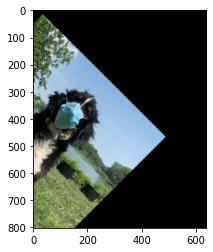

In [ ]:
dog_rotated2 = rotate(dog_image_RGB, 45, (0,50))
plt.imshow(dog_rotated2)

##### <u> 7. Drawing on images  <u/> 
- Line
- Rectangle
- Circle
- Text

Example: Object detection

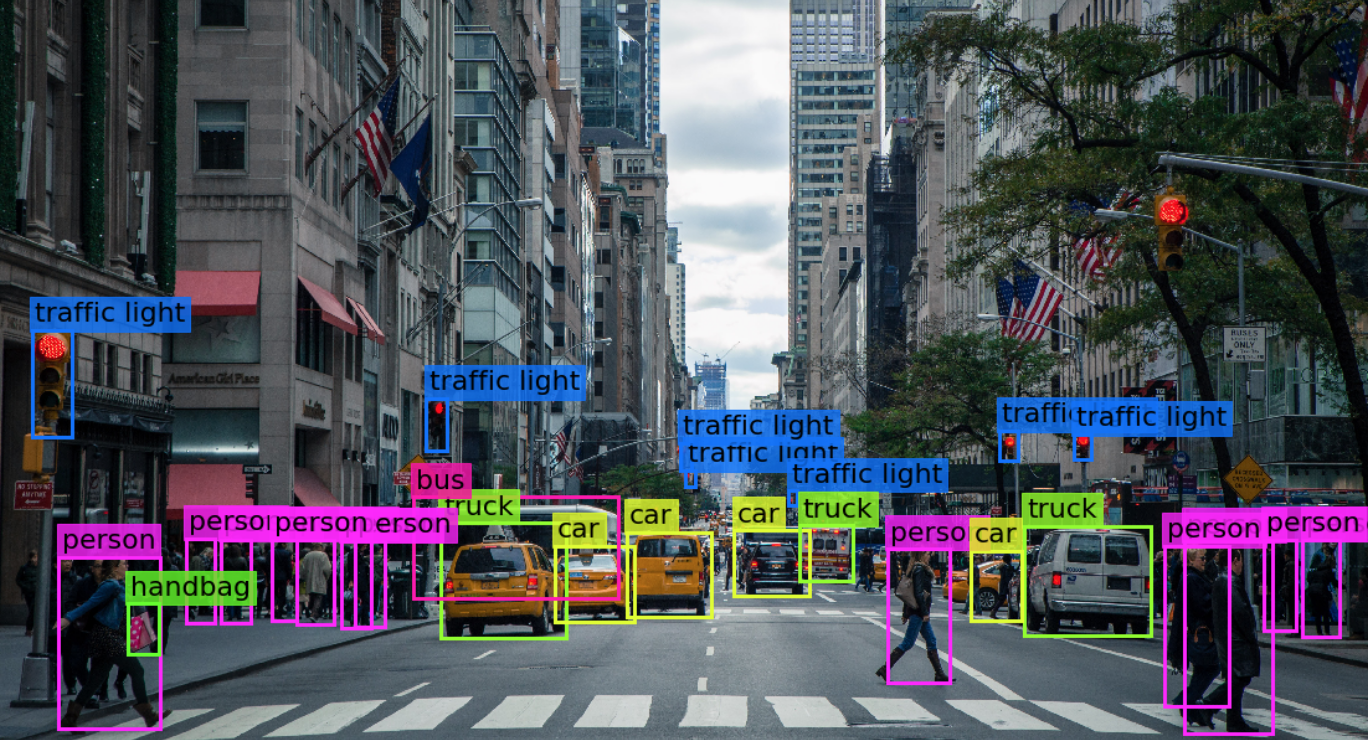

##### 7.1 Drawing a Line
- Parameters: base image, coordinates of start point, end point, colour, thickness

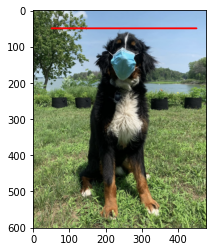

In [ ]:
cv.line(dog_scaled, (50,50), (450,50), (255,0,0), 4)
plt.imshow(dog_scaled)

##### 7.2 Drawing a rectangle
- Parameters: base image, coordinates of top-left corner, bottom-right corner, colour, thickness

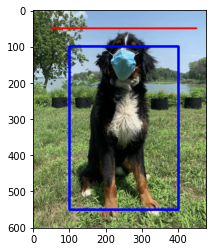

In [ ]:
cv.rectangle(dog_scaled, (100,100), (400,550), (0,0,255),5)
plt.imshow(dog_scaled)

##### 7.3 Drawing a circle
- Parameters: base image, coordinates of centre, radius, colour, thickness

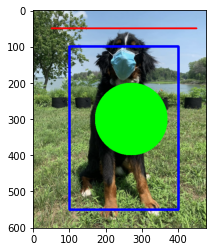

In [ ]:
cv.circle(dog_scaled, (270,300), 100, (0,255,0), -1)
plt.imshow(dog_scaled)

# Passing -1 as the argument for thickness fills in the shape

##### 7.4 Adding text
- Parameters: base image, text to be added, coordinates, font style, font size, colour, thickness

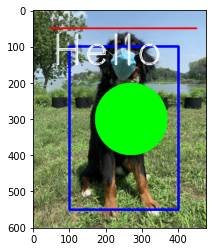

In [ ]:
cv.putText(dog_scaled, "Hello", (50,150), 
           cv.FONT_HERSHEY_DUPLEX, 4, (255,255,255),2)
plt.imshow(dog_scaled)

##### <u> 8. Bitwise operations  <u/> 

- Used for masking of images (#9)

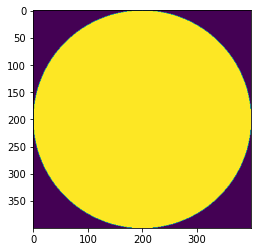

In [ ]:
# creating the square and circle to visualize the bitwise operations

blank = np.zeros((400,400), dtype='uint8')

rectangle = cv.rectangle(blank.copy(), (30,30), (370,370), 255, -1)
circle = cv.circle(blank.copy(), (200,200), 200, 255, -1)
plt.imshow(rectangle)
plt.imshow(circle)

##### 8.1 Bitwise AND
- intersecting region

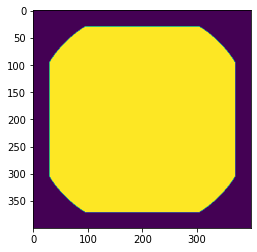

In [ ]:
rect_intersect_circle = cv.bitwise_and(rectangle, circle)
plt.imshow(rect_intersect_circle)

##### 8.2 Bitwise OR
- union

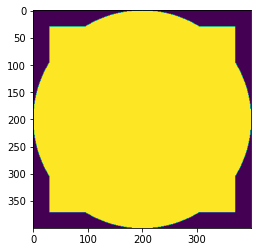

In [ ]:
rect_union_circle = cv.bitwise_or(rectangle,circle)
plt.imshow(rect_union_circle)

##### 8.3 Bitwise XOR
- non-intersecting regions

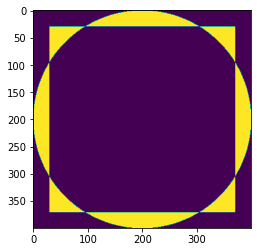

In [ ]:
rect_XOR_circle = cv.bitwise_xor(rectangle, circle)
plt.imshow(rect_XOR_circle)

##### 8.4 Bitwise NOT
- complement

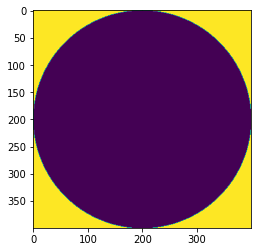

In [ ]:
not_circle = cv.bitwise_not(circle)
plt.imshow(not_circle)

##### <u> 9. Masking  <u/> 

##### First we create the mask

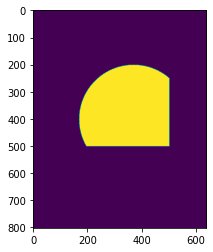

In [ ]:
# Create the mask
blank = np.zeros(dog_image_RGB.shape[0:2], dtype='uint8')
rect = cv.rectangle(blank.copy(), (30,30), (500, 500), 255,-1)
circ = cv.circle(blank.copy(), (dog_image_RGB.shape[1]//2+50 , 
                                dog_image_RGB.shape[0]//2), 200, 255,-1)
weird_shape = cv.bitwise_and(rect, circ)
plt.imshow(weird_shape)

- Use bitwise 'and' function, and pass in the the mask under the parameter mask
- the image has to be entered twice

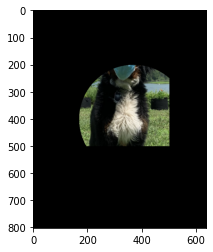

In [ ]:
dog_masked = cv.bitwise_and(dog_image_RGB, dog_image_RGB, mask=weird_shape)
plt.imshow(dog_masked)

##### <u> 10. Edge Detection  <u/> 

- Used to find boundaries of objects in images
- For image segmentation, feature extraction etc

##### **Canny edge detector**
- Steps in the algorithm: 
    - Gaussian Blur
    - Determine the intensity gradients (Sobel filter)
    - Non-maximum suppression
    - Double thresholding
    - Edge tracking by hysteresis
##### http://justin-liang.com/tutorials/canny/

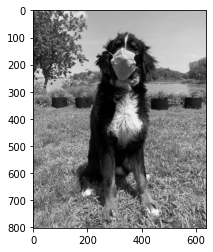

In [ ]:
dog_grayscale = cv.cvtColor(dog_image_RGB, cv.COLOR_RGB2GRAY)
plt.imshow(dog_grayscale, cmap="gray")

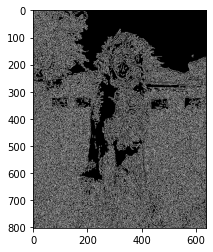

In [ ]:
dog_edges = cv.Canny(dog_grayscale, 20, 30)
plt.imshow(dog_edges, cmap="gray")

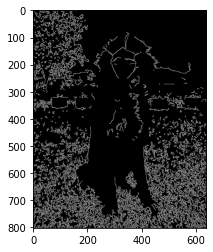

In [ ]:
# Increasing the threshold
dog_edges_high_thresh = cv.Canny(dog_grayscale, 200, 400)
plt.imshow(dog_edges_high_thresh, cmap="gray")

##### You can perform bilateral filtering first to reduce noise, then edge detection

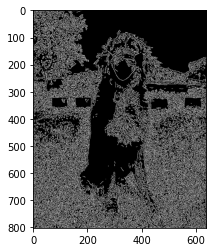

In [ ]:
dog_smooth = cv.bilateralFilter(dog_image_RGB, 100, 200, 100)
#plt.imshow(dog_smooth)
dog_smooth_gray = cv.cvtColor(dog_smooth, cv.COLOR_RGB2GRAY)
#plt.imshow(dog_smooth_gray, cmap="gray")
dog_smooth_edges = cv.Canny(dog_smooth_gray, 20,30)
plt.imshow(dog_smooth_edges, cmap="gray")

##### Comparing edges without vs with bilateral filtering applied prior to edge detection, with the same canny parameters:

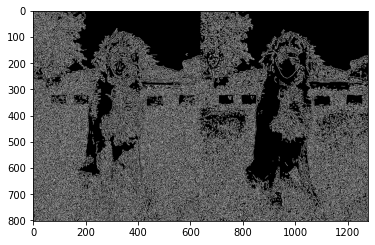

In [ ]:
edges_imgs = np.hstack((dog_edges, dog_smooth_edges))
plt.imshow(edges_imgs, cmap="gray")

##### <u> 11. Template matching  <u/> 

- Finding small parts in an image that match a template image
- Is sometimes a much simpler solution than a neural network for object detection
- *May be useful in this Data Science Competiiton

In [ ]:
tomnjerry = cv.imread("tomnjerry.jpg")
tomnjerry= cv.cvtColor(tomnjerry, cv.COLOR_BGR2RGB)
tomnjerry_gray = cv.cvtColor(tomnjerry, cv.COLOR_RGB2GRAY)

template = cv.imread("jerry.jpg")
template= cv.cvtColor(template, cv.COLOR_BGR2RGB)
template_gray = cv.cvtColor(template, cv.COLOR_RGB2GRAY)
template_gray = rescaleFrame(template_gray, scale=0.5)

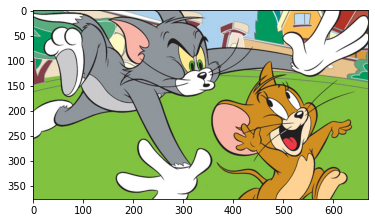

In [ ]:
plt.imshow(tomnjerry)

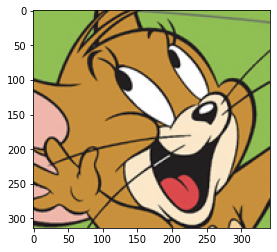

In [ ]:
plt.imshow(template)

- Your template will slide pixel by pixel across your image
- For each position, a similarity metric is computed between your template image, and the part of the image it covers:

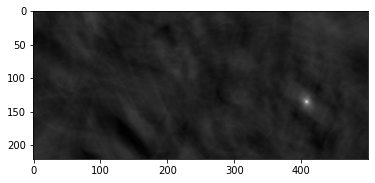

In [ ]:
result = cv.matchTemplate(tomnjerry_gray, template_gray, cv.TM_CCOEFF_NORMED)
plt.imshow(result, cmap="gray")

- It returns a grayscale image, where each pixel denotes how much the neighbourhood of that pixel match with template.
- So the more white a region is, the more it matched with the template
- If input image is of size (W, H) and template image is of size (w, h), output image will have a size of (W-w+1, H-h+1)

##### We can then get the coordinates of the whitest area, which would be the location in the template image lies

In [ ]:
min_val, max_val, min_loc, max_loc = cv.minMaxLoc(result)
print(max_val)
print(max_loc)

0.9994466304779053
(408, 135)


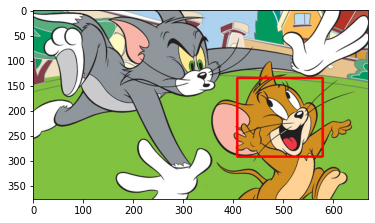

In [ ]:
top_left = max_loc

w,h = template_gray.shape[::-1]
# getting the dimensions of the template image, 
# as this would be the dimension of the bounding box we will draw on the image
# the -1 switches the x and y val, as rows correspond to height and cols correspond to width

bottom_right = (top_left[0]+ w, top_left[1] + h)

cv.rectangle(tomnjerry, top_left, bottom_right,(255,0,0),3)
plt.imshow(tomnjerry)

##### <u> 12. Histogram computation and equalisation  <u/> 
 

##### An image histogram is
- A graphical representation of the intensity distribution of an image
- Quantifies the number of pixels for each intensity value considered.
- Histogram equalization improves the contrast in an image, in order to stretch out the intensity range

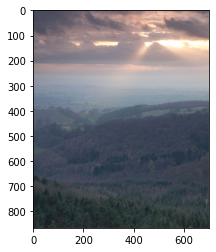

In [ ]:
sky = cv.imread("sky.jpg")
sky_RGB = cv.cvtColor(sky, cv.COLOR_BGR2RGB)
plt.imshow(sky_RGB)

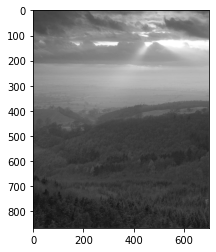

In [ ]:
sky_gray = cv.cvtColor(sky, cv.COLOR_BGR2GRAY)
plt.imshow(sky_gray, cmap="gray")

##### Lets calculate the distribution of pixel intensity for the grayscale image

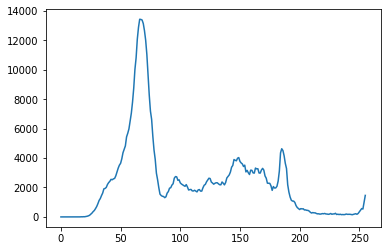

In [ ]:
sky_gray_hist = cv.calcHist([sky_gray], [0], None, [256], [0,256])
plt.figure()
plt.plot(sky_gray_hist)
plt.show()

- The x axis refers to the pixel intensity
- The y axis refers to the freqeuency of pixels ocurring at these intensities 

- The pixels are clustered/overrepresented around certain ranges of intensities (50-90)
- Underrepresented in the rest of the areas

##### We can now perform histogram equalization and compare the resulting histogram and image

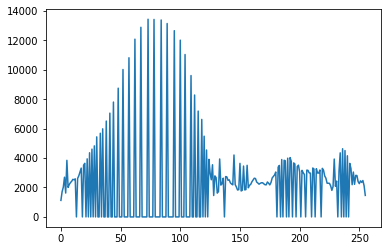

In [ ]:
sky_gray_equalized = cv.equalizeHist(sky_gray)

sky_gray_equalized_hist = cv.calcHist([sky_gray_equalized], [0], None, [256], [0,256])
plt.figure()
plt.plot(sky_gray_equalized_hist)
plt.show()

- x-axis: pixel intensity
- y-axis: frequency

##### The resulting image has a much higher contrast compared to the original image

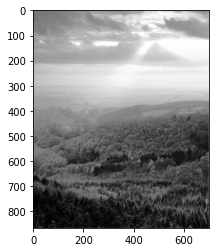

In [ ]:
plt.imshow(sky_gray_equalized, cmap="gray")

##### You can also calculate the distribution of pixel intensity for each colour individually (R,G,B)

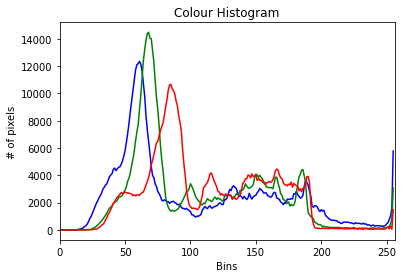

In [ ]:
plt.figure()
plt.title('Colour Histogram')
plt.xlabel('Bins')
plt.ylabel('# of pixels')
colors = ('b', 'g', 'r')
for i,col in enumerate(colors):
    hist = cv.calcHist([sky_RGB], [i], None, [256], [0,256])
    plt.plot(hist, color=col)
    plt.xlim([0,256])

plt.show()